In [7]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Train a Custom Face Detection Model 
Let's train your own face detector, we can use a CNN-based model. Here i will use PyTorch:

In [9]:
def preprocess_images(image_dir, target_size=(224, 224)):
    images = []
    labels = []  # This will be used if you're working with labeled data like LFW
    # image_folder = os.path.join(image_dir, 'lfw-deepfunneled')  # Path to the folder containing images
    
    for root, dirs, files in os.walk(image_dir):  # Traverse through subfolders
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Ensure you're processing image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize image to target size
                    img = cv2.resize(img, target_size)
                    # Convert image to grayscale (optional)
                    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                   
    images = np.array(images)
    return images

In [10]:
wf_data_path = "C:/Users/galin/Downloads/LFW dataset/lfw-deepfunneled"
lfw_images = preprocess_images(wf_data_path)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define a basic CNN architecture
class FaceDetectorCNN(nn.Module):
    def __init__(self):
        super(FaceDetectorCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*54*54, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification: face or no face

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare your data
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

# Use your preprocessed datasets (wider_images/lfw_images) here
train_dataset = datasets.ImageFolder(lfw_images, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize model, loss, and optimizer
model = FaceDetectorCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Train for 10 epochs
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


### 1. Dataset Collection
You will need a dataset with images of faces and non-faces. Common datasets used for face detection are:

- Labeled Faces in the Wild (LFW)
- FDDB (Face Detection Dataset and Benchmark)

For simplicity, let's assume you are using OpenCV's pre-trained Haar Cascade classifier for initial training.

In [8]:
wf_data_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw-deepfunneled/"

### 2. Feature Extraction

To train a machine learning model, you need features that represent faces. Haar Features are a good choice for this task.

You can use HOG features, or you can directly use the Haar Cascade features (which OpenCV already provides as XML files) for detecting faces.

The HOG features are typically used with an SVM classifier, which could work well without using deep learning.

You can extract HOG features as follows:

In [5]:
import cv2
from skimage.feature import hog
from skimage import exposure

# Load image
image = cv2.imread(f'{wf_data_path}/lfw-deepfunneled/Zico/Zico_0001.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract HOG features
fd, hog_image = hog(gray, visualize=True, block_norm='L2-Hys')

# Rescale the HOG image for display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Show the result
cv2.imshow('HOG Image', hog_image_rescaled)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 3. Train a Support Vector Machine (SVM) Classifier
You can use SVM to classify whether the extracted features correspond to a face or not.




In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Assuming X contains the extracted features (HOG or others) and y contains labels (1 for face, 0 for non-face)
X = np.array([...])  # Features
y = np.array([...])  # Labels (1 for face, 0 for non-face)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the SVM classifier
clf = SVC(kernel='linear')  # You can experiment with other kernels like 'rbf'
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))


You can experiment with different classifiers like Random Forest, k-NN, or Logistic Regression, but SVM tends to work well for image classification tasks.

### 4. Integrating the Model for Face Detection
Once you have a trained model, you can use OpenCV to detect faces in a live video feed or an image. You can use OpenCV's Haar Cascade or your SVM model for this task.

In [ ]:
# Initialize the trained model (if using an SVM)
# clf = load_trained_model()  # Example of loading an SVM model

# Initialize OpenCV’s Haar Cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read image
img = cv2.imread('test_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show the image with detected faces
cv2.imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 5. Model Evaluation
Evaluate the performance of your face detection system using metrics like precision, recall, F1 score, and accuracy. Since you are using traditional machine learning methods, make sure to test the classifier on both face and non-face data to ensure it's working well.


# New one

In [66]:
# Define paths
data_root = 'C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset'
images_dir = 'C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw-deepfunneled'

match_train_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/matchpairsDevTrain.csv"
mismatch_train_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/mismatchpairsDevTrain.csv"

match_test_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/matchpairsDevTest.csv"
mismatch_test_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/mismatchpairsDevTrain.csv"

lfw_allnames_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw_allnames.csv"
people_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/people.csv"

In [67]:
# Read the CSV files
match_train_pairs = pd.read_csv(match_train_pairs_path, skiprows=1, names=['image1', 'image2'])
mismatch_train_pairs = pd.read_csv(mismatch_train_pairs_path, skiprows=1, names=['image1', 'image2'])

match_test_pairs = pd.read_csv(match_test_pairs_path, skiprows=1, names=['image1', 'image2'])
mismatch_test_pairs = pd.read_csv(mismatch_test_pairs_path, skiprows=1, names=['image1', 'image2'])

lfw_allnames = pd.read_csv(lfw_allnames_path, skiprows=1, names=['name', 'images'])
people = pd.read_csv(people_path)


In [79]:
people[(people['images'].isna())]

,name,images
601,NaN,NaN
1157,NaN,NaN
1710,NaN,NaN
2271,NaN,NaN
2839,NaN,NaN
3367,NaN,NaN
3965,NaN,NaN
4567,NaN,NaN
5148,NaN,NaN


In [80]:
people.dropna(subset=['name', 'images'], inplace=True)

In [83]:
people.isna().sum()

name      0
images    0
dtype: int64

In [94]:
people['images'] = people['images'].astype('int64')

In [95]:
people.dtypes

name      object
images     int64
dtype: object

In [96]:
lfw_allnames.dtypes

name      object
images     int64
dtype: object

In [112]:
images_data_dir = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw-deepfunneled/lfw-deepfunneled/"


In [113]:
persons = os.listdir(images_data_dir)

In [114]:
len(persons)

5749

In [179]:
import random

random_person = random.choice(persons)
random_person

'Ted_Maher'

In [180]:
image_select = os.listdir(os.path.join(images_data_dir, random_person))
image_select = image_select[0]
image_select

'Ted_Maher_0001.jpg'

x:71 y:68 w:108 h:108


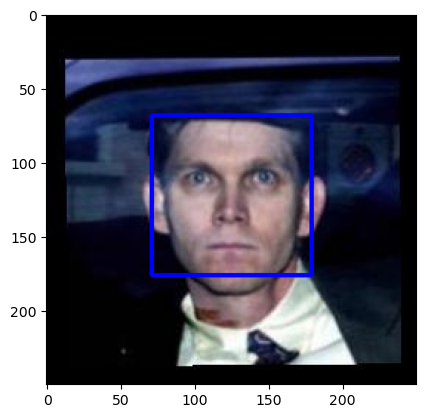

In [181]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(f'{images_data_dir}{random_person}/{image_select}')
# plt.imshow(gray)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_detect.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
faces
for (x, y, w, h) in faces:
    print(f'x:{x} y:{y} w:{w} h:{h}')
    cv2.rectangle(image, (x, y), (x+w ,y+h), (255, 0, 0), 2)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Starts over

In [182]:
people_df = pd.read_csv('C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/people.csv')
people_train_df = pd.read_csv('C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/peopleDevTrain.csv')
people_test_df = pd.read_csv('C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/peopleDevTest.csv')

In [185]:
people_train_df

,name,images
0,AJ_Cook,1
1,Aaron_Eckhart,1
2,Aaron_Patterson,1
3,Aaron_Peirsol,4
4,Aaron_Pena,1
...,...,...
4033,Zinedine_Zidane,6
4034,Ziwang_Xu,1
4035,Zorica_Radovic,1
4036,Zumrati_Juma,1


In [117]:
# for file in os.listdir(data_root):

#     if file.endswith(".csv"):
#         print(file)
#         # df = pd.read_csv(file)
#         # print(f"{file} columns:", df.columns)
#         df = pd.read_csv(file)


import os
import pandas as pd

for file in os.listdir(data_root):
    if file.endswith(".csv"):
        file_path = os.path.join(data_root, file)  # Join data_root with the filename
        print(f"Processing file: {file_path}")

        # Check if the file exists
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            print(f"{file} columns:", df.columns)
            print()
        else:
            print(f"File not found: {file_path}")



Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\lfw_allnames.csv
lfw_allnames.csv columns: Index(['name', 'images'], dtype='object')

Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\lfw_readme.csv
lfw_readme.csv columns: Index(['Labeled Faces in the Wild'], dtype='object')

Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\matchpairsDevTest.csv
matchpairsDevTest.csv columns: Index(['name', 'imagenum1', 'imagenum2'], dtype='object')

Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\matchpairsDevTrain.csv
matchpairsDevTrain.csv columns: Index(['name', 'imagenum1', 'imagenum2'], dtype='object')

Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\mismatchpairsDevTest.csv
mismatchpairsDevTest.csv columns: Index(['name', 'imagenum1', 'name.1', 'imagenum2'], dtype='object')

Processing file: C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset\mismatchpairsDevTrain.csv
mismatchpairsDevTrain.csv c

In [ ]:
from skimage.feature import hog

def preprocess_image(image_path):
    # Load and resize the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    
    # Extract HOG features
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return features


In [47]:
# from sklearn.model_selection import train_test_split

# def load_data(pairs, dataset_dir):
#     data = []
#     labels = []

#     for _, row in pairs.iterrows():
#         print(row)
#         break
#     #     name1, id1, name2, id2, label = row['name'], row['id1'], row['name2'], row['id2'], row['label']
        
#     #     # Construct paths for each image
#     #     image1_path = os.path.join(dataset_dir, name1, f"{name1}_{id1:04}.jpg")
#     #     image2_path = os.path.join(dataset_dir, name2, f"{name2}_{id2:04}.jpg")
        
#     #     # Preprocess images and extract features
#     #     features1 = preprocess_image(image1_path)
#     #     features2 = preprocess_image(image2_path)
        
#     #     # Concatenate features of both images
#     #     combined_features = np.hstack((features1, features2))
#     #     data.append(combined_features)
#     #     labels.append(label)

#     # return np.array(data), np.array(labels)

# # Load the data
# data, labels = load_data(pairs, dataset_dir)
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [25]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

def preprocess_image(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    
    # Resize the image to a fixed size (e.g., 100x100)
    image = cv2.resize(image, (100, 100))
    
    # Normalize pixel values to [0, 1] range
    image = image / 255.0
    
    # Flatten the image to create a 1D feature vector
    return image.flatten()

def find_image_path(name, id, dataset_dir):
    # Recursively search for the image file in all subdirectories
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            # Match name and ID with any file extension
            if file.startswith(f"{name}_{int(id):04}"):
                return os.path.join(root, file)
    return None

def load_data(pairs, dataset_dir):
    data = []
    labels = []

    for _, row in pairs.iterrows():
        name1, id1 = row['name'], row['imagenum1']
        name2, id2 = row.get('name.1', row['name']), row['imagenum2']
        # print(row)
        
        # Dynamically find the image paths
        image1_path = find_image_path(name1, id1, dataset_dir)
        image2_path = find_image_path(name2, id2, dataset_dir)
        # print(f'Image 1 path: {image1_path}')
        # print(f'Image 2 path: {image2_path}')
        # break
        
        # # Only proceed if both images are found
        # if image1_path and image2_path:
        #     # Preprocess images and extract features
        #     features1 = preprocess_image(image1_path)
        #     features2 = preprocess_image(image2_path)
            
        #     if features1 is None or features2 is None:
        #         continue  # Skip if image loading failed
            
        #     # Concatenate features of both images
        #     combined_features = np.hstack((features1, features2))
        #     data.append(combined_features)
            
        #     # Set label based on the file name: match pairs = 1, mismatch pairs = 0
        #     label = 1 if 'match' in pairs.name.lower() else 0
        #     labels.append(label)
        # else:
        #     print(f"Missing images for pair: {name1} - {id1}, {name2} - {id2}")

    return np.array(data), np.array(labels)

# Define dataset directory and load pairs files
dataset_dir = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw-deepfunneled"
pairs_file = os.path.join(dataset_dir, '../matchpairsDevTrain.csv')
pairs = pd.read_csv(pairs_file)

# Load the data
data, labels = load_data(pairs, dataset_dir)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


KeyboardInterrupt: 

In [26]:
import pandas as pd

# Paths to the CSV files
match_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/matchpairsDevTrain.csv"
mismatch_pairs_path = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/mismatchpairsDevTrain.csv"

# Read the CSV files
match_pairs = pd.read_csv(match_pairs_path, header=None, names=['image1', 'image2'])
mismatch_pairs = pd.read_csv(mismatch_pairs_path, header=None, names=['image1', 'image2'])

# Label the pairs as 1 (match) and 0 (mismatch)
match_pairs['label'] = 1
mismatch_pairs['label'] = 0

# Combine both datasets
pairs = pd.concat([match_pairs, mismatch_pairs], ignore_index=True)

# Check first few entries
print(pairs.head())


      image1     image2  label
0  imagenum1  imagenum2      1
1          1          2      1
2          3          4      1
3          1          2      1
4          1          2      1


In [27]:
import cv2
import numpy as np
import os

# Directory with the images
image_dir = "C:/Users/ggeorgieva.HAEMIMONT/Downloads/LFW dataset/lfw-deepfunneled"

# Function to extract features from an image
def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Couldn't read image {image_path}")
        return None
    # Resize image to a fixed size (for consistency)
    image_resized = cv2.resize(image, (100, 100))
    # Flatten the image into a vector (1D array)
    return image_resized.flatten()

# Extract features for each image pair
def create_features(pairs, image_dir):
    features = []
    labels = []
    
    for index, row in pairs.iterrows():
        # Get image paths for the pair
        image1_path = os.path.join(image_dir, row['image1'])
        image2_path = os.path.join(image_dir, row['image2'])

        # Extract features from both images
        feature1 = extract_features(image1_path)
        feature2 = extract_features(image2_path)
        
        if feature1 is not None and feature2 is not None:
            # Combine the features of both images into one feature vector
            combined_features = np.concatenate((feature1, feature2))
            features.append(combined_features)
            labels.append(row['label'])

    return np.array(features), np.array(labels)

# Create features and labels
features, labels = create_features(pairs, image_dir)

# Check the shape of the features
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the classifier
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, data, labels, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")
